In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
import nxviz as nv
import scipy.misc as ms
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
df = pd.read_csv(u'sample.csv', encoding = 'utf8')

In [3]:
G = nx.Graph()
G.add_nodes_from(df['Alfa'], bipartite='Alfa')
G.add_nodes_from(df['Beta'], bipartite='Beta')
G.add_edges_from(zip(df['Alfa'], df['Beta']))

In [4]:
G.nodes()

['a1',
 'a2',
 'a3',
 'a4',
 'a5',
 'a6',
 'a7',
 ' b1',
 ' b2',
 ' b3',
 ' b4',
 ' b5',
 ' b6',
 ' b7',
 ' b8',
 ' b14',
 ' b9',
 ' b10',
 ' b11',
 ' b12',
 ' b13',
 ' b15',
 ' b16',
 ' b17',
 ' b18',
 ' b19',
 ' b20']

In [5]:
G.edges()

[('a1', ' b1'),
 ('a1', ' b2'),
 ('a1', ' b3'),
 ('a1', ' b4'),
 ('a1', ' b5'),
 ('a2', ' b1'),
 ('a2', ' b2'),
 ('a2', ' b3'),
 ('a2', ' b6'),
 ('a2', ' b7'),
 ('a2', ' b8'),
 ('a3', ' b4'),
 ('a3', ' b5'),
 ('a3', ' b6'),
 ('a3', ' b7'),
 ('a3', ' b14'),
 ('a4', ' b8'),
 ('a4', ' b9'),
 ('a4', ' b10'),
 ('a4', ' b11'),
 ('a4', ' b12'),
 ('a4', ' b13'),
 ('a5', ' b9'),
 ('a5', ' b10'),
 ('a5', ' b11'),
 ('a5', ' b12'),
 ('a5', ' b13'),
 ('a6', ' b14'),
 ('a6', ' b15'),
 ('a6', ' b16'),
 ('a6', ' b17'),
 ('a6', ' b18'),
 ('a6', ' b19'),
 ('a6', ' b20'),
 ('a7', ' b15'),
 ('a7', ' b16'),
 ('a7', ' b17'),
 ('a7', ' b18'),
 ('a7', ' b19'),
 ('a7', ' b20')]

In [6]:
alfa_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'Alfa']
beta_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'Beta']
alfaG = nx.bipartite.projected_graph(G, nodes=alfa_nodes)
betaG = nx.bipartite.projected_graph(G, nodes=beta_nodes)

In [7]:
alfaG.edges()

[('a1', 'a3'),
 ('a1', 'a2'),
 ('a2', 'a3'),
 ('a2', 'a4'),
 ('a3', 'a6'),
 ('a4', 'a5'),
 ('a6', 'a7')]

In [8]:
alfaG.nodes()

['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']

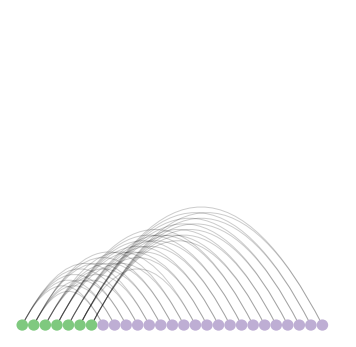

In [9]:
c = nv.ArcPlot(G, node_grouping='bipartite',node_color='bipartite')
c.draw()
#nx.draw(G)
plt.show()

/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


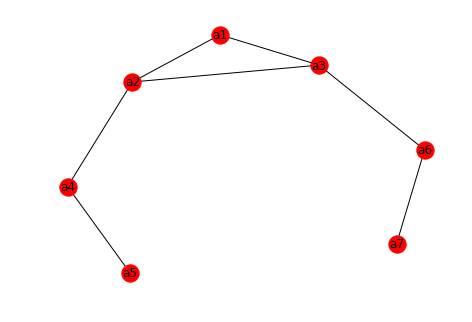

In [10]:
nx.draw(alfaG, with_labels = True)
plt.show()

/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


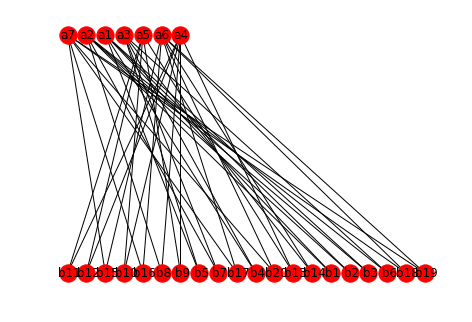

In [11]:
X,Y = nx.bipartite.sets(G)
pos = dict()
pos.update( (n, (i, 2)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (i, 1)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(G, pos=pos, with_labels = True)
plt.show()

In [12]:
number_of_connections = []
for node in X:
    count = 0
    liste = []
    for edge in G.edges():
        if edge[0] == node:
            count = count + 1
            liste.append(edge[1])
    number_of_connections.append([node, count, liste])
    
number_of_connections

[['a7', 6, [' b15', ' b16', ' b17', ' b18', ' b19', ' b20']],
 ['a2', 6, [' b1', ' b2', ' b3', ' b6', ' b7', ' b8']],
 ['a1', 5, [' b1', ' b2', ' b3', ' b4', ' b5']],
 ['a3', 5, [' b4', ' b5', ' b6', ' b7', ' b14']],
 ['a5', 5, [' b9', ' b10', ' b11', ' b12', ' b13']],
 ['a6', 7, [' b14', ' b15', ' b16', ' b17', ' b18', ' b19', ' b20']],
 ['a4', 6, [' b8', ' b9', ' b10', ' b11', ' b12', ' b13']]]

In [13]:
number_of_common_connections = []
for i in range(len(number_of_connections)-1):
    for j in range(i+1,len(number_of_connections)):
        number_of_common_connections.append([number_of_connections[i][0],number_of_connections[j][0],len(set(number_of_connections[i][2])&set(number_of_connections[j][2]))])
        
number_of_common_connections

[['a7', 'a2', 0],
 ['a7', 'a1', 0],
 ['a7', 'a3', 0],
 ['a7', 'a5', 0],
 ['a7', 'a6', 6],
 ['a7', 'a4', 0],
 ['a2', 'a1', 3],
 ['a2', 'a3', 2],
 ['a2', 'a5', 0],
 ['a2', 'a6', 0],
 ['a2', 'a4', 1],
 ['a1', 'a3', 2],
 ['a1', 'a5', 0],
 ['a1', 'a6', 0],
 ['a1', 'a4', 0],
 ['a3', 'a5', 0],
 ['a3', 'a6', 1],
 ['a3', 'a4', 0],
 ['a5', 'a6', 0],
 ['a5', 'a4', 5],
 ['a6', 'a4', 0]]

In [14]:
Graph = nx.Graph()
Graph.add_nodes_from(X, bipartite='Alfa')
Graph.nodes()

['a7', 'a2', 'a1', 'a3', 'a5', 'a6', 'a4']

In [15]:
Nb = len(Y)
for common_connection in number_of_common_connections:
    Ni = 0
    Nj = 0
    Nij = common_connection[2]
    if Nij != 0:
        node_i = common_connection[0]
        node_j = common_connection[1]
        for connection in number_of_connections:
            if node_i == connection[0]:
                Ni = connection[1]
            elif node_j == connection[0]:
                Nj = connection[1]
        summ = 0
        for k in range(Nij):
            H = (ms.comb(Ni,k)*ms.comb(Nb-Ni,Nj-k))/ms.comb(Nb,Nj)
            summ = summ + H
        prob = 1-summ
        if prob<0.0005:
            Graph.add_edges_from([(node_i,node_j)])

/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


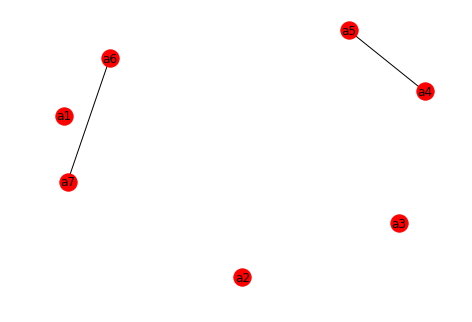

In [16]:
nx.draw(Graph, with_labels = True)
plt.show()

/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


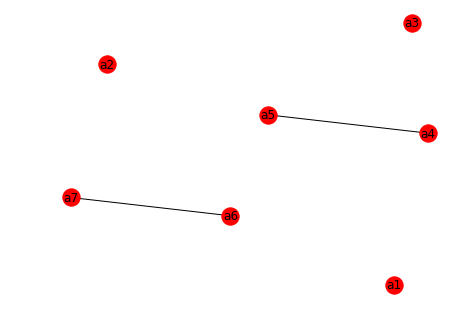

In [17]:
pos = graphviz_layout(Graph)
nx.draw(Graph, pos, with_labels = True)

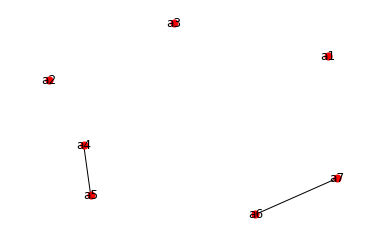

In [19]:
spring_pos = nx.spring_layout(Graph)
plt.axis("off")
nx.draw_networkx(Graph,pos = spring_pos, node_size = 50)